In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

In [ ]:
diabetes = datasets.load_diabetes()
diabetes.keys()  # to find the content of data

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [ ]:
diabetes["feature_names"]

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [ ]:
df = pd.DataFrame(diabetes['data'],columns = diabetes['feature_names']) #putting our data in a Dataframe

In [ ]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [ ]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
bp,0
s1,0
s2,0
s3,0
s4,0
s5,0
s6,0


In [ ]:
x = df
y = diabetes['target']

In [ ]:
from sklearn.model_selection import train_test_split #to split our data into training and testing set

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 101) #splitting our data

In [ ]:
from sklearn import  linear_model

In [ ]:
model = linear_model.LinearRegression()

In [ ]:
model.fit(x_train, y_train)  # Training data is used always

# Prediction of testset result of  the Prepared Model
y_pre = model.predict(x_test)   # puts the test feature value to get the label value which are predicted by the model

In [ ]:
from sklearn.model_selection import cross_val_score    #importing
scores = cross_val_score(model,x,y,scoring="neg_mean_squared_error" , cv=10)
rmse_scores=np.sqrt(-scores).mean()    #calculating  root mean sq. of the resulted scores of array
rmse_scores

54.40468149952541

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pre)

0.4576757978851993

In [ ]:
mse=mean_squared_error(y_test, y_pre)
rmse=np.sqrt(mse)
rmse

58.009325528664334

In [ ]:
print("Weights:",model.coef_)
print("\nIntercept",model.intercept_)

Weights: [  -8.02358048 -308.83941066  583.63743356  299.99074281 -360.66454462
   95.11692608  -93.03587104  118.15977759  662.11309186   26.07805489]

Intercept 153.72032548545178


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,x,y,scoring="neg_mean_squared_error" , cv=10)
rmse_scores=np.sqrt(-scores).mean()
rmse_scores

54.40468149952541

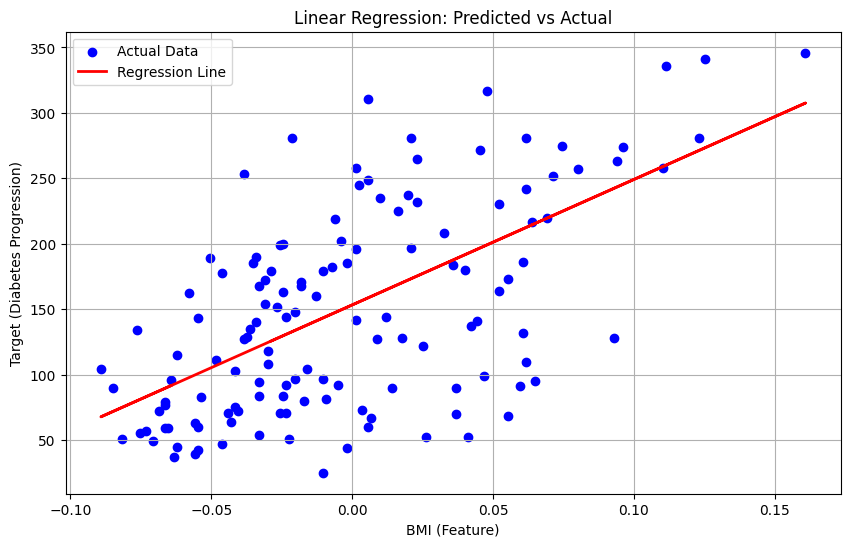

In [ ]:
# Importing required libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# Create a DataFrame from the dataset
df = pd.DataFrame(diabetes['data'], columns=diabetes['feature_names'])
x = df[['bmi']]  # Selecting a single feature ('bmi') for simplicity
y = diabetes['target']  # Target variable

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

# Create and train the linear regression model
model = linear_model.LinearRegression()
model.fit(x_train, y_train)

# Predict the test set results
y_pred = model.predict(x_test)

# Plotting the regression line with data points
plt.figure(figsize=(10, 6))

# Scatter plot of actual data points
plt.scatter(x_test, y_test, color='blue', label='Actual Data')

# Line plot for the regression line
plt.plot(x_test, y_pred, color='red', label='Regression Line', linewidth=2)

# Adding labels, title, and legend
plt.title('Linear Regression: Predicted vs Actual')
plt.xlabel('BMI (Feature)')
plt.ylabel('Target (Diabetes Progression)')
plt.legend()
plt.grid(True)
plt.show()
